# 1. 블랙 박스 게시글 csv 파일 load 데이터

In [1]:
import pandas as pd
import numpy as np

In [2]:
black_box = pd.read_csv('data/black_box.csv',sep=None)

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
black_box.tail()

,brand,title,content
2164,팅크웨어/아이나비,[2채널LCD무],아침출근길에 재부팅 2번이나뜨네요....오히려 업그레이드전이 쫌덜한거같았는데...아...
2165,팅크웨어/아이나비,[2채널LCD무],어제 집앞에 차를 대놓고 집에있다가 나왔는데\n차 오른쪽 앞바퀴 쪽에 검게 쫙 글어...
2166,팅크웨어/아이나비,[2채널LCD무],FXD 900 오늘 혼자서 설치해봤는데요\n 접지를 잘못 연결하는 바람에 한참 고민...
2167,팅크웨어/아이나비,[1채널],"안녕하세요.\n 아이나비 블랙클레어 1 , 몇 년 잘 사용하고 있는 사람입니다.\n..."
2168,팅크웨어/아이나비,[2채널LCD무],유라이브 알바트로스2를 구입해서 불량이 생겨 fxd900마하로 교환하여 쓰고 있습니...


# 2. 데이터 프레임 나누기(브랜드 별로)

In [4]:
itro = black_box[:440]

In [6]:
itro.tail()

,brand,title,content
435,아이트로닉스,[2채널LCD유],6월 19일에 장착한 2000HD가 전원이 들어오지 않아서 오늘 AS 보냈습니다.\...
436,아이트로닉스,[2채널LCD유],"주간에는 그럭저럭 볼만한데, 주간에도 후방영상은 가까이 있는 차량 번호판만 확인이 ..."
437,아이트로닉스,ITB-2000HD 전압차단 관련..,안녕하세요.\n\nITB-2000HD 사용 중인데\n\n차가 레이라 배터리 80으로...
438,아이트로닉스,2000HD 터치 잘되나요??,"어느순간부터 터치는되는데 설정이나.. 뒤로가기, 카메라 설정(전,후방) 등등 안멉히..."
439,아이트로닉스,[1채널],100sp 사용중입니다..\n\n그런데 언제부터인가 동영상과 같은 현상이 나타납니다...


In [5]:
cnc = black_box[440:880]

In [6]:
fine = black_box[880:1320]

In [7]:
qr = black_box[1320:1749]

In [8]:
inavi = black_box[1749:]

In [9]:
brand_list  = ['itro', 'cnc' , 'fine' , 'qr', 'inavi']

총 데이터 갯수

In [10]:
black_box2 = black_box.dropna(axis=0, how='any')
len(black_box2)

2122

## 1.content 가 null 인 경우 처리 ( 동영상만 있었거나 사진만 올린경우 )

In [7]:
def null_ck(df):
    print (df.isnull().sum())
    

In [8]:
itro = itro.dropna(axis=0, how='any')

In [13]:
cnc = cnc.dropna(axis=0, how='any')

In [14]:
fine = fine.dropna(axis=0, how='any')

In [15]:
qr = qr.dropna(axis=0, how='any')

In [16]:
inavi = inavi.dropna(axis=0, how='any')

In [9]:
itro.tail()

,brand,title,content
435,아이트로닉스,[2채널LCD유],6월 19일에 장착한 2000HD가 전원이 들어오지 않아서 오늘 AS 보냈습니다.\...
436,아이트로닉스,[2채널LCD유],"주간에는 그럭저럭 볼만한데, 주간에도 후방영상은 가까이 있는 차량 번호판만 확인이 ..."
437,아이트로닉스,ITB-2000HD 전압차단 관련..,안녕하세요.\n\nITB-2000HD 사용 중인데\n\n차가 레이라 배터리 80으로...
438,아이트로닉스,2000HD 터치 잘되나요??,"어느순간부터 터치는되는데 설정이나.. 뒤로가기, 카메라 설정(전,후방) 등등 안멉히..."
439,아이트로닉스,[1채널],100sp 사용중입니다..\n\n그런데 언제부터인가 동영상과 같은 현상이 나타납니다...


## 2. 불용어 제거 

In [10]:
from konlpy.tag import Twitter
tw = Twitter()
stop_words = open('data/stopwords-ko.txt').read().split('\n')

def normalize(df):
    global text
    text = []
    try:
        for i in df['content']:
            nouns = tw.nouns(i)
            filtered_nouns = [ noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
            text.append(filtered_nouns)
    except:
        print (type(i),i)
    return text

In [11]:
def result(text):
    result_lst = []
    for i in text:
        result_lst.extend(i)
    print (len(result_lst))
    return result_lst

In [12]:
def save_txt(result_lst, brand):
    with open('data/'+brand+'_normalized.txt', 'w') as f:
        f.write(' '.join(result_lst))
    return result_lst

## * 브랜드 별로 불용어 제거 후 단어 추출

In [13]:
itro_normal = save_txt(result(normalize(itro)),'itro')

15570


In [14]:
itro_normal

['체험',
 '신청',
 '동체',
 '신청',
 '활동',
 '안내',
 '가기',
 '클릭',
 '체험',
 '모집',
 '일정',
 '조사',
 '제품',
 '에코',
 '엔씨',
 '유리',
 '코팅',
 '네이버',
 '블랙박스',
 '동호회',
 '네이버',
 '블랙박스',
 '동호회',
 '회원',
 '차량',
 '블랙박스',
 '대한',
 '기본',
 '지식',
 '차량',
 '전문',
 '견해',
 '회원',
 '동호회',
 '활동',
 '회원',
 '차량',
 '디지털카메라',
 '캠코더',
 '소지',
 '모집',
 '인원',
 '모집',
 '기간',
 '선정',
 '발표',
 '제품',
 '발송',
 '체험',
 '활동',
 '기간',
 '우수',
 '체험',
 '발표',
 '예정',
 '일정',
 '상황',
 '변경',
 '에코',
 '엔씨',
 '체험',
 '신청서',
 '작성',
 '클릭',
 '체험',
 '임무',
 '영상',
 '사진',
 '첨부',
 '후기',
 '수령',
 '구성',
 '소개',
 '디자인',
 '리뷰',
 '제품',
 '사용',
 '차량',
 '외관',
 '리뷰',
 '주행',
 '테스트',
 '운행',
 '외관',
 '상태',
 '변화',
 '제품',
 '에피소드',
 '제품',
 '총평',
 '체험',
 '활동',
 '장소',
 '자격',
 '조건',
 '디카',
 '디지털',
 '캠코더',
 '소지',
 '블로그',
 '운영',
 '최소',
 '커뮤니티',
 '활동',
 '네이버',
 '블랙박스',
 '동호회',
 '까페',
 '에코',
 '엔씨',
 '유리',
 '코팅',
 '체험',
 '후기',
 '카테고리',
 '필수',
 '후기',
 '심사',
 '장소',
 '네이버',
 '개인',
 '블로그',
 '필수',
 '최소',
 '차량',
 '블랙박스',
 '자동차',
 '관련',
 '싸이트',
 '동호회',
 '리뷰',
 '작성',
 '블랙박스',
 '동호회',
 '로고',
 '사진',
 '동영상'

In [25]:
black_normal = save_txt(result(normalize(black_box2)),'black_box')

96814


In [21]:
qr_normal = save_txt(result(normalize(qr)),'qr')

16289


In [22]:
cnc_normal = save_txt(result(normalize(cnc)),'cnc')

26190


In [23]:
fine_normal = save_txt(result(normalize(fine)),'fine')

19926


In [24]:
inavi_normal = save_txt(result(normalize(inavi)),'inavi')

18839


In [26]:
def black_pos(df): 
    black_pos = []
    for i in df:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
    print (len(adj_lst))
    return adj_lst 

In [27]:
def _pos(df): 
    black_pos = []
    for i in df['content']:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
    print (len(adj_lst))
    return adj_lst  

In [28]:
inavi_pos = _pos(inavi)

3162


# 분석 대상 단어 선정하기¶
브랜드별 게시글을 분석할 때 블랙박스와 어느 정도 관련된 단어만을 대상으로 하기 위해 분석 대상 단어를 선정한다. 
전체 블랙박스 내용 중 일정 수 이상 출현한 단어만을 분석 대상 단어로 정하였다.

In [29]:
from collections import Counter

full_counter = Counter(black_normal)

target_words = [key for key, value in full_counter.most_common(500)]

분석 대상 단어 500개를 출현 빈도 순으로 나열

In [30]:
print (target_words)

['영상', '제품', '녹화', '후방', '주차', '블랙박스', '설정', '카메라', '문제', '주행', '모드', '사용', '전원', '메모리', '로드', '차량', '전방', '파일', '블박', '화면', '정도', '기능', '케이블', '화질', '펌웨어', '카드', '아이나비', '경우', '충격', '확인', '다시', '구매', '배터리', '구입', '저장', '채널', '부분', '연결', '상태', '작동', '루카스', '포맷', '정상', '업데이트', '모델', '재부팅', '그냥', '시동', '모션', '증상', '체험', '오늘', '터치', '메모리카드', '이벤트', '프레임', '설치', '감지', '상시', '재생', '계속', '전압', '교체', '장착', '때문', '차단', '문의', '야간', '전용', '썬팅', '한번', '사진', '뷰어', '동작', '용량', '센터', '현상', '방법', '본체', '너무', '시전', '고객', '정보', '불량', '기본', '추가', '일반', '후기', '현재', '아래', '인식', '변경', '지금', '밝기', '속도', '버튼', '생각', '가요', '가격', '동영상', '가지', '회원', '전면', '지원', '사고', '답변', '운전', '자동', '기존', '소리', '교환', '운행', '처음', '센서', '번호판', '개선', '상황', '보조', '블랙', '수리', '박스', '기기', '사용자', '차이', '촬영', '테스트', '멘트', '무상', '전화', '정말', '만원', '포멧', '발생', '패스', '버전', '방식', '보고', '주간', '하니', '업그레이드', '거치', '음성', '택배', '차선', '오류', '이후', '시스템', '내용', '수신', '부팅', '서비스', '표시', '재원', '시큐리티', '알림', '원래', '어제', '안전', '민감', '방전', '설명', '초기'

# 2. TF-IDF로 브랜드 별 게시글 특징 잡아내기

In [31]:
print (brand_list)

['itro', 'cnc', 'fine', 'qr', 'inavi']


In [32]:
counters = []

In [33]:
def count_word(lst):
    counter = Counter(lst)
    print (len(counter))
    global counters
    counters.append(counter)
    return counter

In [34]:
itro_cnt = count_word(itro_normal)

2399


In [35]:
cnc_cnt = count_word(cnc_normal)

3231


In [36]:
fine_cnt = count_word(fine_normal)

3163


In [37]:
qr_cnt = count_word(qr_normal)

2556


In [38]:
inavi_cnt = count_word(inavi_normal)

3176


In [39]:
import math

def tf(word, counter):
    return counter[word]

def idf(word, corpus):
    num_containing = sum(1 for counter in corpus if counter[word] > 0)
    return math.log(len(corpus) / (1 + num_containing))

def tfidf(word, counter, corpus):
    """TF-IDF 점수를 구한다."""
    #print (tf(word, counter) * idf(word, corpus))
    return tf(word, counter) * idf(word, corpus)

In [40]:
def tfidf_scores(_cnt ,target_words,counters):
    scores = {}
    for word in target_words:
        score = tfidf(word, _cnt, counters)
        scores[word] = score
        
    new_dict = {}
    for k,v in scores.items():
        if v != 0.0:
            new_dict[k] = v
    #scores_sorted = sorted(scores.items(), key=lambda x:x[1], reverse=True)
    #return scores_sorted
    return new_dict

In [41]:
def tfidf_cloud(_cnt, target_words, counters, name):
    """브랜드별로 블랙박스에 대한 분석 대상 단어들의 TF-IDF 점수를 워드 클라우드로 그린다."""
    scores = tfidf_scores(_cnt, target_words, counters)
    #print(scores)
    tfidf_wc = WC.generate_from_frequencies(scores)
    tfidf_wc.to_file('data/' + name  + '.png')

## 4. 브랜드별로 워드 클라우드 그리기

In [42]:
from wordcloud import WordCloud
from PIL import Image

In [43]:
font_file = 'resources/Daum_SemiBold.ttf'
WC = WordCloud(font_path=font_file, width=500, height=500)

### (1) 아이트로닉스

In [44]:
tfidf_cloud(itro_cnt , target_words, counters , 'itro')

ValueError: could not convert string to float: '후'

In [ ]:
itro_img = Image.open('data/itro.png')
itro_img

In [70]:
tfidf_cloud(cnc_cnt , target_words, counters , 'cnc')

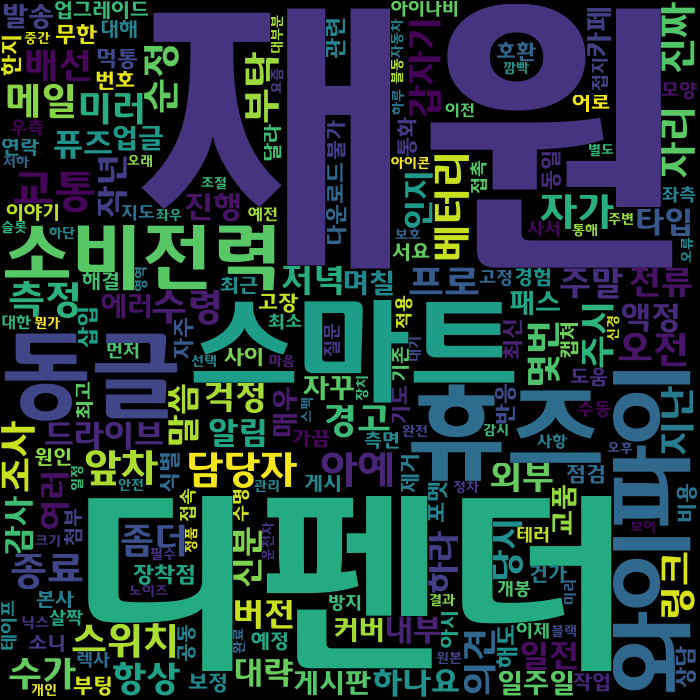

In [71]:
cnc_img = Image.open('data/cnc.png')
cnc_img

In [72]:
tfidf_cloud(qr_cnt , target_words, counters , 'qr')

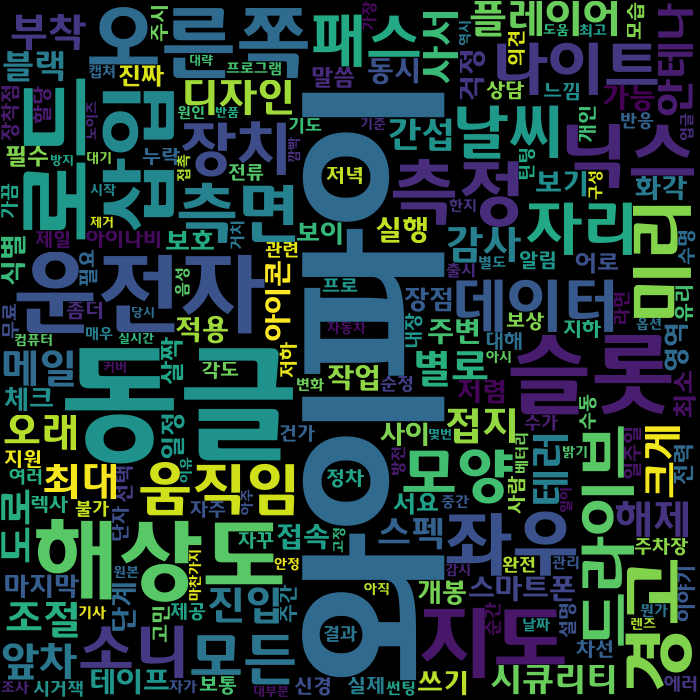

In [73]:
qr_img = Image.open('data/qr.png')
qr_img

In [74]:
tfidf_cloud(inavi_cnt , target_words, counters , 'inavi')

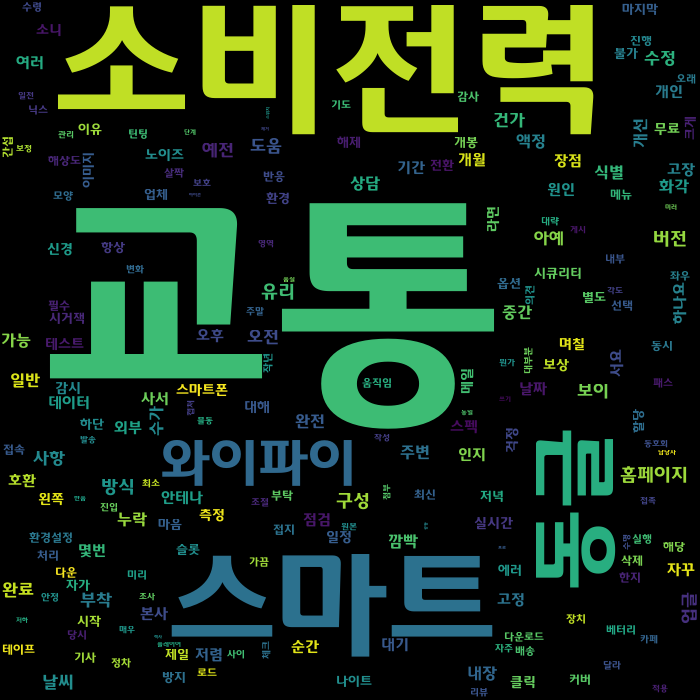

In [75]:
inavi_img = Image.open('data/inavi.png')
inavi_img

In [76]:
tfidf_cloud(fine_cnt , target_words, counters , 'fine')

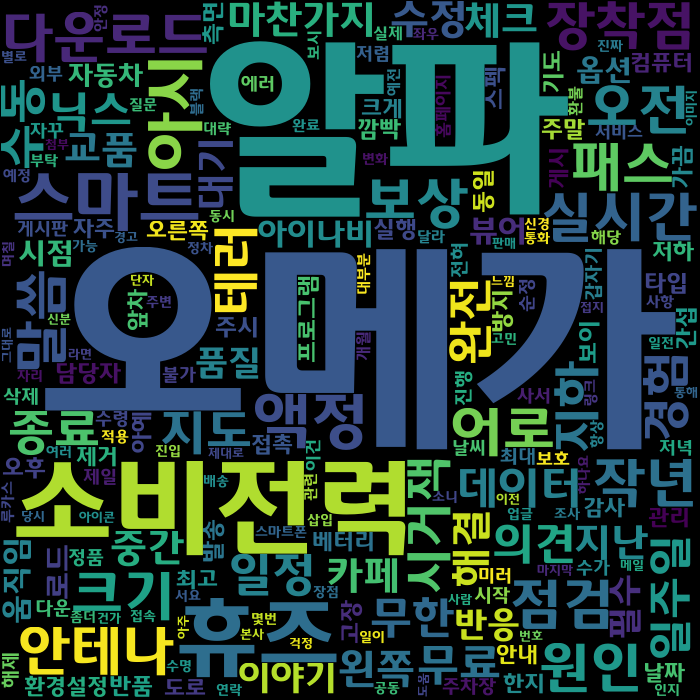

In [77]:
fine_img = Image.open('data/fine.png')
fine_img